In [1]:
from pylab import *

In this code, the Maxwell-Boltzman distribution of velocity of a gas is sampled using the acceptance-rejection method.

In [2]:
def p_v(v): #m, k, T = 1
    p_v = 4* np.pi * (1/(2*np.pi))**(3/2) * v**2 * np.exp(-v**2/2)
    return p_v

def p_e(E):
    return 2*sqrt(E/pi)*np.exp(-E)

In [3]:
rcParams.update({'font.size': 21})

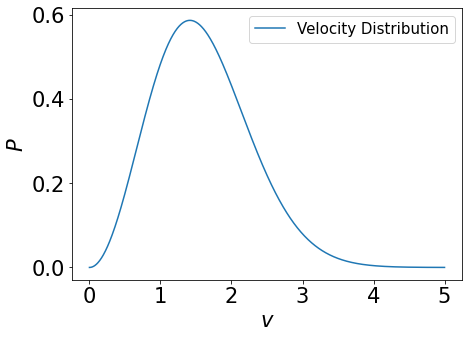

In [4]:
v = np.linspace(0,5,1000)
E = 0.5*v**2
figure(figsize=(7,5))
plot(v,p_v(v), label = 'Velocity Distribution')
#plot(E, p_e(E), label = 'Energy Distribution')
legend(fontsize=15)
xlabel('$v$')
ylabel('$P$')
# xlim([0, 7])
show()

In [27]:
pv_max = max(p_v(v))

In [28]:
R1 = np.random.rand(len(v))
R2 = np.random.rand(len(v))
# print(R1,R2)
x_try = 5*R1
y_try = R2*pv_max
p_xtry = p_v(x_try)

In [29]:
idx = np.where(p_xtry >= y_try)[0]
idx_rej = np.where(p_xtry < y_try)[0]

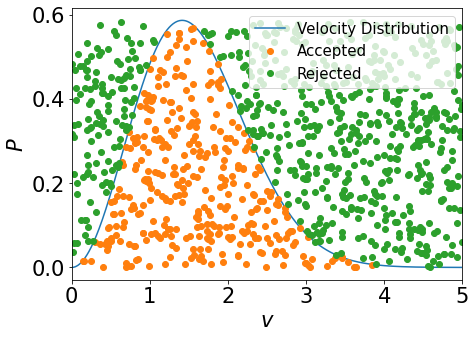

In [31]:
figure(figsize=(7,5))
plot(v,p_v(v), label = 'Velocity Distribution')
plot(x_try[idx], y_try[idx],'o', label = 'Accepted')
plot(x_try[idx_rej], y_try[idx_rej], 'o', label = 'Rejected')
#plot(E, p_e(E), label = 'Energy Distribution')
legend(fontsize=15)
xlabel('$v$')
ylabel('$P$')
xlim([0, 5])
show()

In [32]:
eff = len(idx)/len(v) * 100
print('Efficiency is:', eff)

Efficiency is: 34.8


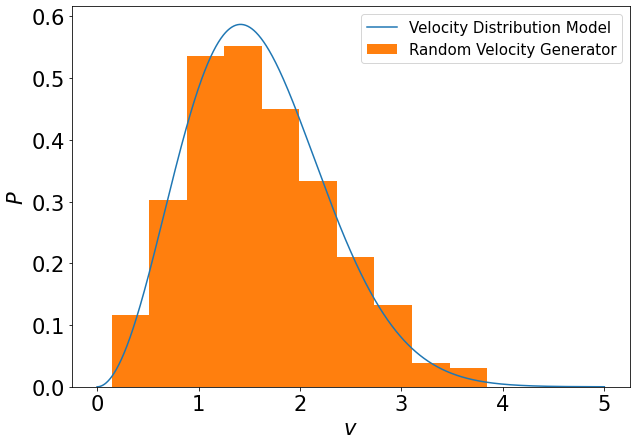

In [33]:
figure(figsize=(10,7))
plot(v,p_v(v), label = 'Velocity Distribution Model')
hist(x_try[idx], density = True ,label = 'Random Velocity Generator')
#plot(E, p_e(E), label = 'Energy Distribution')
legend(fontsize=15)
xlabel('$v$')
ylabel('$P$')
# xlim([0, 7])
show()

In [34]:
E_sample = 0.5*x_try[idx]**2

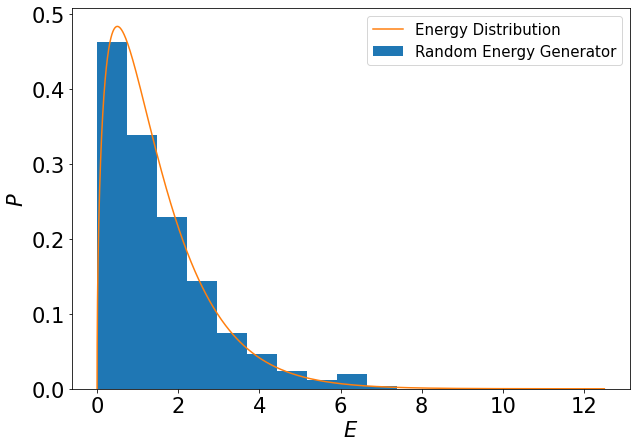

In [35]:
figure(figsize=(10,7))
hist(E_sample, density = True ,label = 'Random Energy Generator')
plot(E, p_e(E), label = 'Energy Distribution')
legend(fontsize=15)
xlabel('$E$')
ylabel('$P$')
# xlim([0, 5])
show()